<a href="https://colab.research.google.com/github/Mostafa-Mohamed-Atef/movies-data-science/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data = pd.read_csv('/content/cleaned_movies .csv')
data

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; over,notalk,notalk,0,13000000,25682380,42195766,2013fail,13000000,25682380,42195766,1,1
1,2012,tt1343727,dredd 3d,ok-disagree,ok,1,45000000,13414714,40868994,2012pass,45658735,13611086,41467257,1,1
2,2013,tt2024544,12 years a slave,notalk-disagree,notalk,0,20000000,53107035,158607035,2013fail,20000000,53107035,158607035,1,1
3,2013,tt1272878,2 guns,notalk,notalk,0,61000000,75612460,132493015,2013fail,61000000,75612460,132493015,1,1
4,2013,tt0453562,42,men,men,0,40000000,95020213,95020213,2013fail,40000000,95020213,95020213,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,1971,tt0067741,shaft,notalk,notalk,0,53012938,70327868,107190108,1971fail,305063707,404702718,616827003,9,5
1752,1971,tt0067800,straw dogs,notalk,notalk,0,25000000,10324441,11253821,1971fail,143862856,59412143,64760273,9,5
1753,1971,tt0067116,the french connection,notalk,notalk,0,2200000,41158757,41158757,1971fail,12659931,236848653,236848653,9,5
1754,1971,tt0067992,willy wonka &amp; the chocolate factory,men-disagree,men,0,3000000,4000000,4000000,1971fail,17263543,23018057,23018057,9,5


In [151]:
data.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

<Axes: >

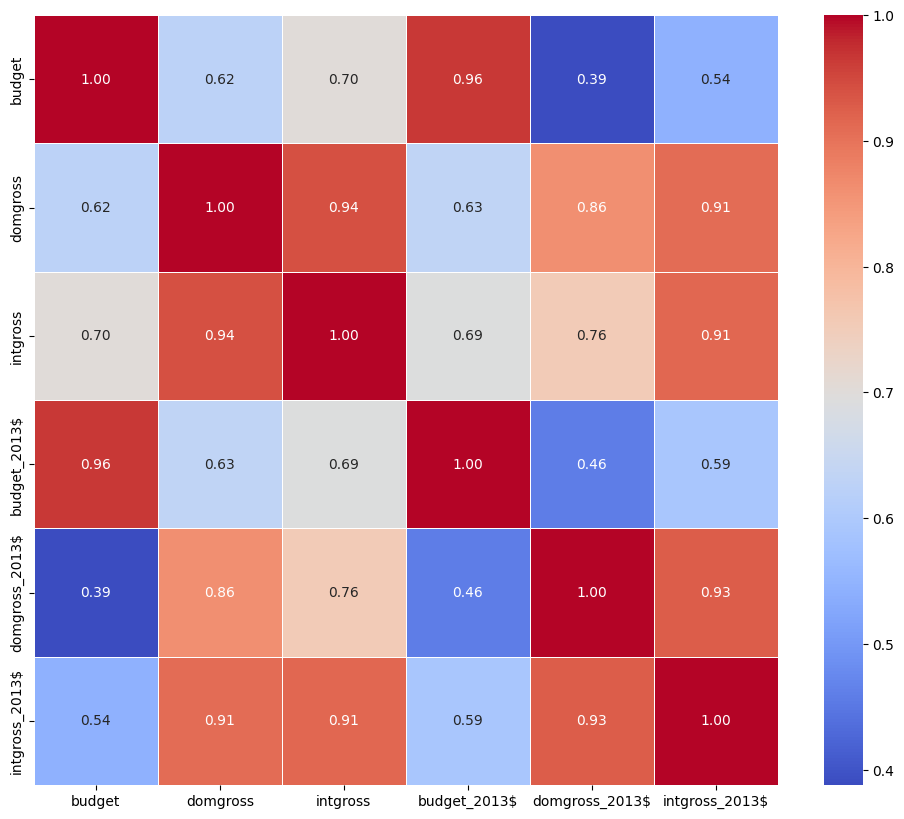

In [152]:
numerical_columns = [
'budget',
       'domgross', 'intgross','budget_2013$', 'domgross_2013$',
       'intgross_2013$'
]

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [153]:
X = data[['intgross','domgross_2013$',
       'intgross_2013$']]
y = data['domgross'].values

In [154]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=44,shuffle = True)

print('x_train : ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (1317, 5)
x_test:  (439, 5)
y_train :  (1317,)
y_test :  (439,)


In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


linear_regression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
linear_regression_model.fit(x_train_normalized, y_train)


LinearRegression(n_jobs=-1)

In [156]:
print(linear_regression_model.score(x_train_normalized,y_train))
print(linear_regression_model.score(x_test_normalized,y_test))

1.0
1.0


In [157]:
y_pred = linear_regression_model.predict(x_test_normalized)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error ,r2_score

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 1.7718465018652565e-08
mean squared error is 9.70117431084761e-16
median absolute error is 1.4901161193847656e-08
the r2 score 1.0


In [158]:
from sklearn.tree import DecisionTreeRegressor

DTM = DecisionTreeRegressor(max_depth=10,random_state=33)
DTM.fit(x_train_normalized,y_train)

print(DTM.score(x_train_normalized,y_train))
print(DTM.score(x_test_normalized,y_test))

0.9999997246608913
0.993870857704942


In [159]:
y_pred = DTM.predict(x_test_normalized)

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 566573.425582049
mean squared error is 36976472032021.81
median absolute error is 85222.79999999702
the r2 score 0.993870857704942


In [160]:
from sklearn.neighbors import KNeighborsRegressor

CLF = KNeighborsRegressor(11)
CLF.fit(x_train_normalized,y_train)


KNeighborsRegressor(n_neighbors=11)

In [161]:
print(CLF.score(x_train_normalized,y_train))
print(CLF.score(x_test_normalized,y_test))

0.9748877725808894
0.9562755468917338


In [162]:
y_pred = CLF.predict(x_test_normalized)

In [163]:
mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 5969198.371505488
mean squared error is 263785035432588.53
median absolute error is 2160948.3636363633
the r2 score 0.9562755468917338
